### Principles of Urban Informatics
### Final Examination - Fall 2016
### Achilles Edwin Alfred Saxby
### aes807

#### Motivation:

One of the things that make NYC so interesting to study is its diversity on many axes: 
- Ethnic, 
- Economic and
- Cultural. 

Neighborhoods tend to be segregated and clustered on most socioeconomic characteristics, however these characteristics do evolve in time. 

The goal is to identify NYC neighborhoods that are homogeneous by clustering their socioeconomic characteristics in 2000, and in 2010, and find the neighborhoods that change cluster, indicating that they evolve differently with respect to their cluster peers (e.g. gentrification).

- All files have been downloaded and stored in the PUIData folder on my personal directory.
- Property of New York University - Center for Urban Science and Progress

### WarmUp

### Finding the number of businesses in 2010 and 2000. 
#### This information is available at the zipcode level.

In [530]:
import os
import ast
import json
import urllib
import urllib2
import zipfile
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime as dt
import matplotlib.pylab as plt
import pysal as psl

from cStringIO import StringIO

%matplotlib inline

In [6]:
!wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip

if os.path.isfile("zbp" + "00" + "totals.zip"):
    print ('File in current directory, moving it to PUIdata')
    os.system("mv " + "zbp" + "00" + "totals.zip " + os.getenv("PUIDATA"))
else:
    print ('File has not been moved yet - maybe not even downloaded')


if not os.path.isfile(os.getenv("PUIDATA") + "/" + "zbp" + "00" + "totals.zip"):
    print ("WARNING!!! something is wrong: the file zbp" + "00" + "totals.zip is not there!")
else:
    print ("zbp" + "00" + "totals.zip file is in PUIdata")

--2016-12-17 13:47:37--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip
           => “zbp00totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp00totals.zip ... 628434
==> PASV ... done.    ==> RETR zbp00totals.zip ... done.
Length: 628434 (614K) (unauthoritative)

100%[======================================>] 628,434     --.-K/s   in 1.1s    

2016-12-17 13:47:38 (584 KB/s) - “zbp00totals.zip” saved [628434]

File in current directory, moving it to PUIdata
zbp00totals.zip file is in PUIdata


##### Stored in PUIData

In [8]:
!wget ftp://ftp.census.gov/econ2010\/CBP_CSV/zbp10\totals.zip

if os.path.isfile("zbp" + "10" + "totals.zip"):
    print ('File in current directory, moving it to PUIdata')
    os.system("mv " + "zbp" + "10" + "totals.zip " + os.getenv("PUIDATA"))
else:
    print ('File has not been moved yet - maybe not even downloaded')


if not os.path.isfile(os.getenv("PUIDATA") + "/" + "zbp" + "10" + "totals.zip"):
    print ("WARNING!!! something is wrong: the file zbp" + "10" + "totals.zip is not there!")
else:
    print ("zbp" + "10" + "totals.zip file is in PUIdata")

--2016-12-17 14:01:14--  ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip
           => “zbp10totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... 
Error in server response, closing control connection.
Retrying.

--2016-12-17 14:06:19--  ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip
  (try: 2) => “zbp10totals.zip”
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /econ2010/CBP_CSV ... done.
==> SIZE zbp10totals.zip ... 797534
==> PASV ... done.    ==> RETR zbp10totals.zip ... done.
Length: 797534 (779K) (unauthoritative)

100%[======================================>] 797,534      507K/s   in 1.5s    

2016-12-17 14:06:21 (507 KB/s) - “zbp10totals.zip” saved [797534]

File in current directory, moving it to PUIdata
zbp10totals.zi

##### Stored in PUIData

In [303]:
PUIData_Path = "/home/cusp/aes807/PUIdata/"

##### Stored in PUIData
- Downloaded from Instructor's Notebooks.

In [322]:
zip_codes_shape = gpd.read_file(PUIData_Path + "NYC_zipcode_ploygons.geojson")
zip_codes_shape.head()

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [323]:
zip_codes_shape = zip_codes_shape.drop([ u'@id', u'BLDGpostalCode', u'PO_NAME', u'CTY_FIPS', 
                                        u'ST_FIPS', u'STATE', u'OBJECTID', u'borough', 
                                        u'Shape_Leng'], axis = 1)
zip_codes_shape = zip_codes_shape.rename(columns={'postalCode' : 'zip_code'})
zip_codes_shape['zip_code'] = pd.to_numeric(zip_codes_shape['zip_code'], errors = 'coerce')
zip_codes_shape.head()

,Shape_Area,geometry,zip_code
0,2.016328e+07,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,2.260653e+07,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,6.269333e+06,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,4.941836e+07,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,6.938587e+07,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [324]:
zip_codes_shape['zip_code'] = pd.to_numeric(zip_codes_shape['zip_code'])
zip_codes_shape['zip_code']

0      11372
1      11004
2      11040
3      11426
4      11365
5      11373
6      11001
7      11375
8      11427
9      11374
10     11366
11     11423
12     11428
13     11432
14     11379
15     11429
16     11435
17     11415
18     11418
19     11433
20     11451
21     11221
22     11421
23     11419
24     11434
25     11216
26     11416
27     11233
28     11436
29     11213
       ...  
232    10106
233    10158
234    10041
235    10120
236    10278
237    10155
238    10022
239    10043
240    10081
241    10096
242    10097
243    10196
244    10196
245    10275
246    10265
247    10045
248    10047
249    10047
250    10080
251    10203
252    10259
253    10260
254    10285
255    10286
256    11370
257    10065
258    10075
259    10069
260    10281
261    10282
Name: zip_code, dtype: int64

### Gathering a zipcode shapefile and merging the number of businesses with the zipcode shapfile.

In [325]:
year = ["00", "10"]

for i in year:
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + "/" + "zbp" + i + "totals.zip")
    temp = pd.read_csv(zf.open('zbp'+ i +'totals.zip'.replace('.zip','.txt')))
    temp.columns = map(str.lower, temp.columns)
    temp = temp[['zip', 'est']]
    year = dt.datetime.strptime(str(i), '%y').year
    temp.rename(columns={'est': str(year), 'zip':'zip_code'}, inplace=True)
    zip_codes_shape = zip_codes_shape.merge(temp, on = 'zip_code', how = 'inner')
    print("Year "+str(i)+'\n')
    print(zip_codes_shape.head())
    print('\n')

zip_codes_shape.head()

Year 00

     Shape_Area                                           geometry  zip_code  \
0  2.016328e+07  POLYGON ((-73.86942457284175 40.74915687096787...     11372   
1  2.260653e+07  POLYGON ((-73.71068374074007 40.75004039450917...     11004   
2  6.269333e+06  POLYGON ((-73.70098278625547 40.73889569923034...     11040   
3  4.941836e+07  POLYGON ((-73.72270447144122 40.75373371438336...     11426   
4  6.938587e+07  POLYGON ((-73.81088634744755 40.72717187575918...     11365   

   2000  
0  1409  
1   189  
2  1350  
3   213  
4   553  


Year 10

     Shape_Area                                           geometry  zip_code  \
0  2.016328e+07  POLYGON ((-73.86942457284175 40.74915687096787...     11372   
1  2.260653e+07  POLYGON ((-73.71068374074007 40.75004039450917...     11004   
2  6.269333e+06  POLYGON ((-73.70098278625547 40.73889569923034...     11040   
3  4.941836e+07  POLYGON ((-73.72270447144122 40.75373371438336...     11426   
4  6.938587e+07  POLYGON ((-73.81088634

,Shape_Area,geometry,zip_code,2000,2010
0,2.016328e+07,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1409,1629
1,2.260653e+07,POLYGON ((-73.71068374074007 40.75004039450917...,11004,189,229
2,6.269333e+06,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1350,1494
3,4.941836e+07,POLYGON ((-73.72270447144122 40.75373371438336...,11426,213,248
4,6.938587e+07,POLYGON ((-73.81088634744755 40.72717187575918...,11365,553,643


##### This table shows the spatial join of the Business Data for the Years 2010 and 2000 joined with the ZipCodes of their respective establishments and areas of the same.

In [326]:
len(zip_codes_shape['zip_code'].unique())

237

### Finding the density of businesses by dividing the number of businesses by the area of the zipcode.

In [327]:
zip_codes_shape.geometry.area == zip_codes_shape["Shape_Area"]

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
dtype: bool

- As we can observe above, the Polygon Calculated Area is not equal to any part of the Shape_Area column given.
- We can take the Polygon area as a better variable to calculate the densities, since it is more reliable than the Shape_Area since we have no idea from where that area has been calculated, we can safely use the area that we calculate.

In [328]:
zip_codes_shape["Calculated_Area"] = zip_codes_shape.geometry.area
zip_codes_shape.head()

,Shape_Area,geometry,zip_code,2000,2010,Calculated_Area
0,2.016328e+07,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1409,1629,0.000200
1,2.260653e+07,POLYGON ((-73.71068374074007 40.75004039450917...,11004,189,229,0.000224
2,6.269333e+06,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1350,1494,0.000062
3,4.941836e+07,POLYGON ((-73.72270447144122 40.75373371438336...,11426,213,248,0.000489
4,6.938587e+07,POLYGON ((-73.81088634744755 40.72717187575918...,11365,553,643,0.000688


In [332]:
zip_codes_shape["Density_2000"] = zip_codes_shape["2000"] / zip_codes_shape["Calculated_Area"]
zip_codes_shape["Density_2010"] = zip_codes_shape["2010"] / zip_codes_shape["Calculated_Area"]
zip_codes_shape.head()

,Shape_Area,geometry,zip_code,2000,2010,Calculated_Area,Density_2000,Density_2010
0,2.016328e+07,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1409,1629,0.000200,7.045865e+06,8.146000e+06
1,2.260653e+07,POLYGON ((-73.71068374074007 40.75004039450917...,11004,189,229,0.000224,8.433038e+05,1.021781e+06
2,6.269333e+06,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1350,1494,0.000062,2.176227e+07,2.408358e+07
3,4.941836e+07,POLYGON ((-73.72270447144122 40.75373371438336...,11426,213,248,0.000489,4.354292e+05,5.069786e+05
4,6.938587e+07,POLYGON ((-73.81088634744755 40.72717187575918...,11365,553,643,0.000688,8.041634e+05,9.350399e+05


##### The Densities Shown here, has been calculated by dividing (the number of establishments in a zipcode) by (the area of that zipcode), since the area is on the higer range. The observations can be seen as minute decimal statistics. 

In [333]:
zip_codes_shape["Density_2000"] = zip_codes_shape["Density_2000"] / 10000
zip_codes_shape["Density_2010"] = zip_codes_shape["Density_2010"] / 10000
zip_codes_shape.head()

,Shape_Area,geometry,zip_code,2000,2010,Calculated_Area,Density_2000,Density_2010
0,2.016328e+07,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1409,1629,0.000200,704.586533,814.600044
1,2.260653e+07,POLYGON ((-73.71068374074007 40.75004039450917...,11004,189,229,0.000224,84.330384,102.178084
2,6.269333e+06,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1350,1494,0.000062,2176.227439,2408.358366
3,4.941836e+07,POLYGON ((-73.72270447144122 40.75373371438336...,11426,213,248,0.000489,43.542923,50.697864
4,6.938587e+07,POLYGON ((-73.81088634744755 40.72717187575918...,11365,553,643,0.000688,80.416343,93.503994


##### To get the densities in a "plottable" , we multiply each density by 10000000 so as to give the ease of plotting the variables.

### The density in a Choropleth (a heatmap version of a geographical map where each zipcode (census tract later) is a different color based on the value of the feature you are mapping) for 2000 and 2010.

##### Laboratory Code - Homework_9 - SRK325 - Laboratory Component 
- The plots in this section have been plotted using the code from the links given below - StackOverFlow and Instructor Codes.
- http://stackoverflow.com/questions/31755886/choropleth-map-from-geopandas-geodatafame
- https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb

In [334]:
Density_2000 = psl.Quantiles(zip_codes_shape["Density_2000"], k=5)
Density_2000

                   Quantiles                    
 
  Lower                Upper               Count
             x[i] <=     80.380               50
    80.380 < x[i] <=    181.852               50
   181.852 < x[i] <=    360.094               50
   360.094 < x[i] <=   5785.196               50
  5785.196 < x[i] <= 162907.869               50

##### Quartile Segregation - Densities for the Year 2000
- The densities, due to the widespread range and large numbers have been seperated into Quartiles.
- This segregates based on the distribution and not the values of the numbers itself, hence it segregates nearly equally.

In [335]:
Density_2010 = psl.Quantiles(zip_codes_shape["Density_2010"], k=5)
Density_2010

                   Quantiles                    
 
  Lower                Upper               Count
             x[i] <=     95.246               50
    95.246 < x[i] <=    229.166               50
   229.166 < x[i] <=    443.306               50
   443.306 < x[i] <=   5090.075               50
  5090.075 < x[i] <= 133062.153               50

##### Quartile Segregation - Densities for the Year 2010
- The densities, due to the widespread range and large numbers have been seperated into Quartiles.
- This segregates based on the distribution and not the values of the numbers itself, hence it segregates nearly equally.

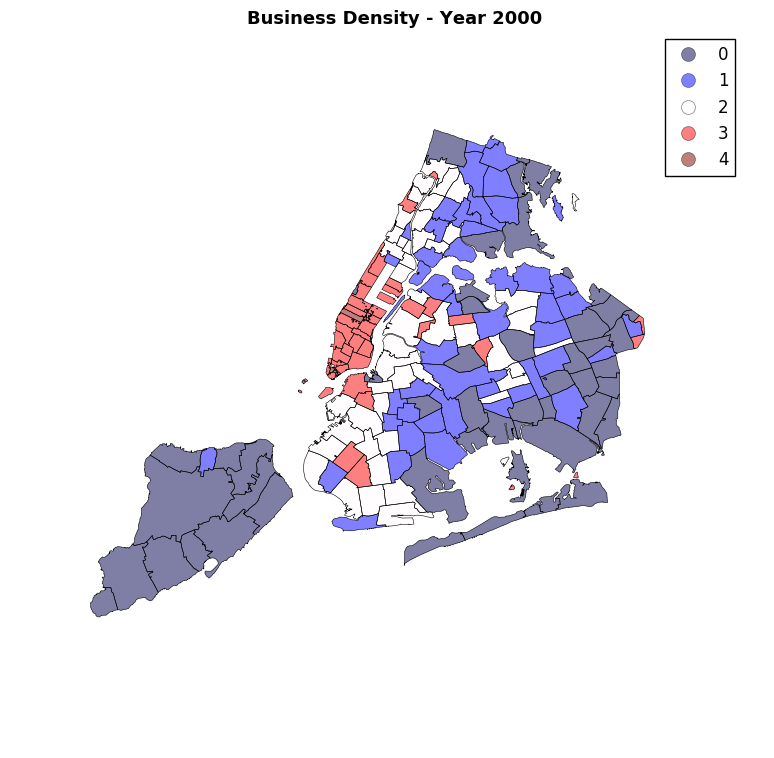

In [336]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

zip_codes_shape.assign(cl=Density_2000.yb).plot(column='cl', categorical=True, 
        k=5, cmap='seismic',ax=ax, linewidth=0.4, edgecolor='black', legend=True,)

ax.set_axis_off()
ax.set_title("Business Density - Year 2000", fontweight = 'bold', fontsize = '13')

#### Figure-1: Observed here is the choropleth/heat map depicting the business densities that existed during the year 2000.

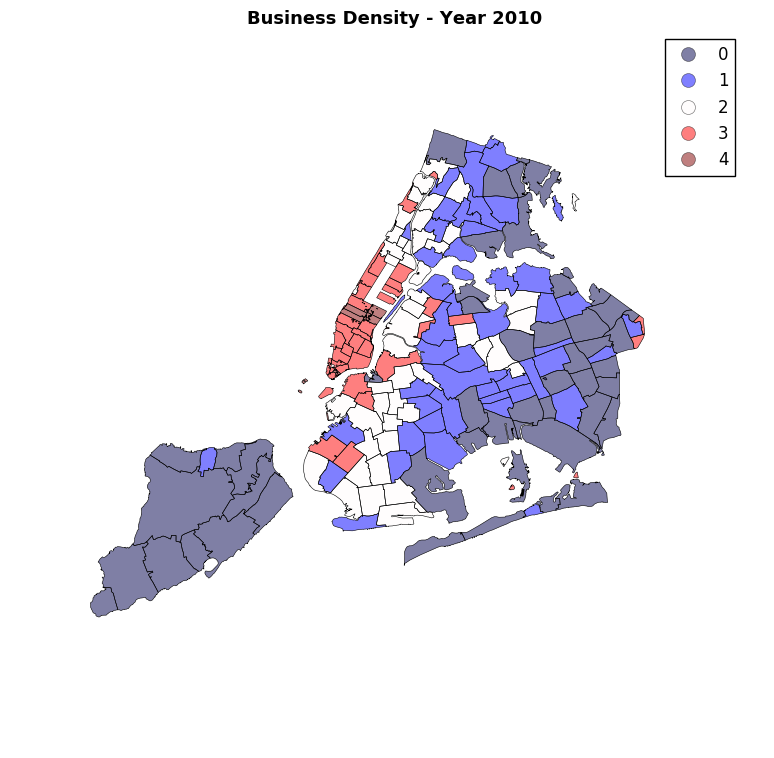

In [337]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

zip_codes_shape.assign(cl=Density_2010.yb).plot(column='cl', categorical=True, 
        k=5, cmap='seismic',ax=ax, linewidth=0.4, edgecolor='black', legend=True)

ax.set_axis_off()
ax.set_title("Business Density - Year 2010", fontweight = 'bold', fontsize = '13')

#### Figure-2: Observed here is the choropleth/heat map depicting the business densities that existed during the year 2010.

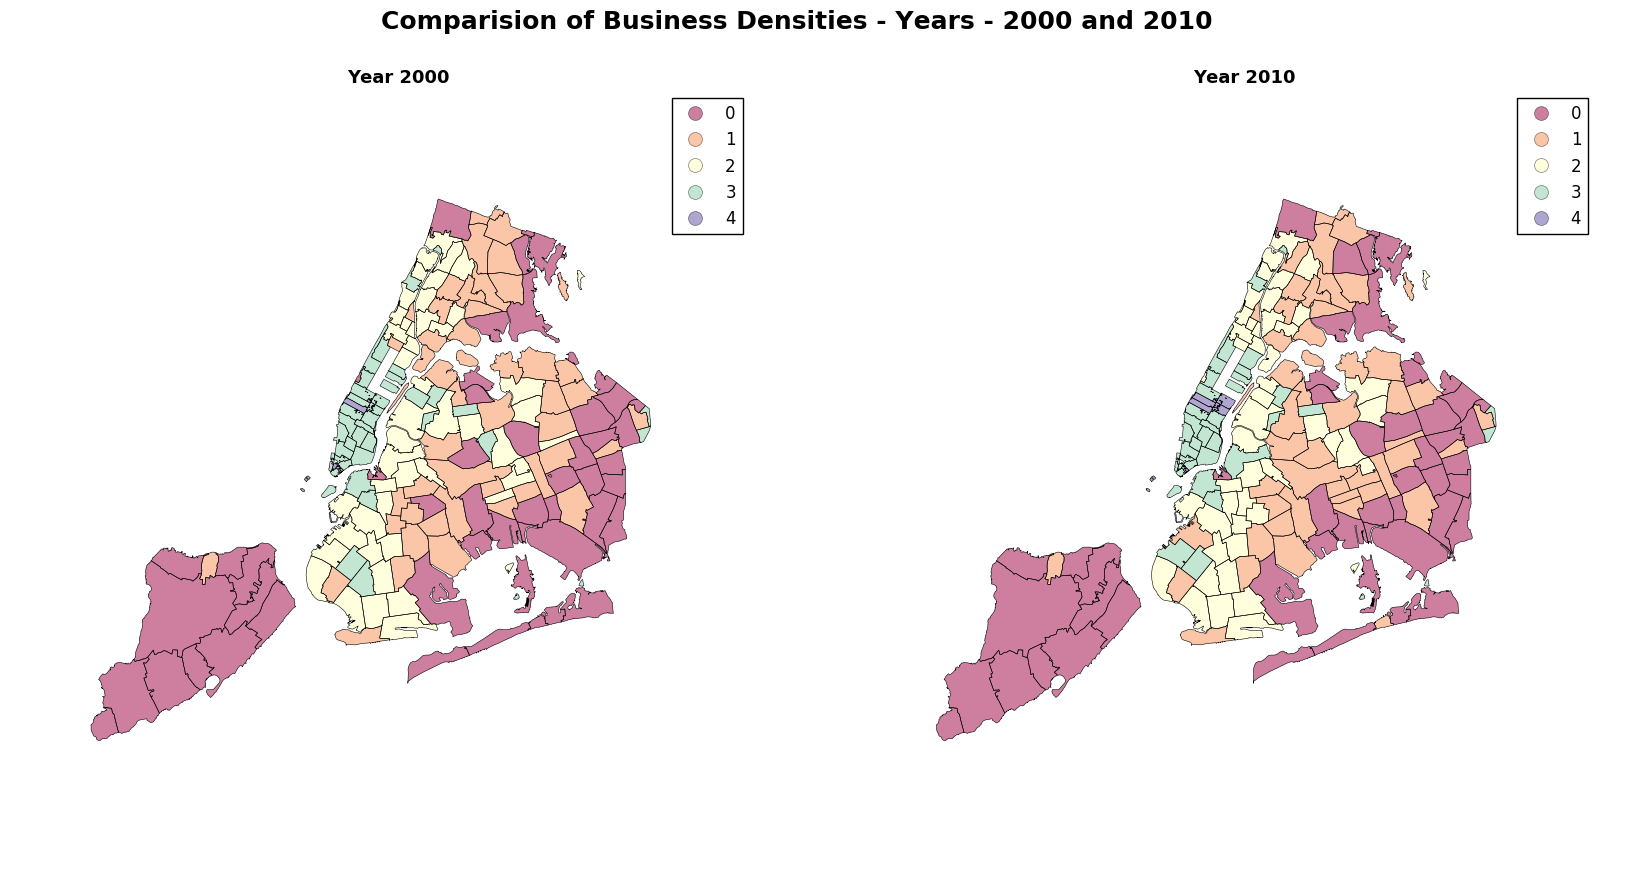

In [338]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

zip_codes_shape.assign(cl=Density_2000.yb).plot(column='cl', categorical=True, 
        k=5, cmap='Spectral',ax=ax1, linewidth=0.4, edgecolor='black', legend=True)

ax1.set_axis_off()
ax1.set_title("Year 2000", fontweight = 'bold', fontsize = '13')


zip_codes_shape.assign(cl=Density_2010.yb).plot(column='cl', categorical=True, 
        k=5, cmap='Spectral',ax=ax2, linewidth=0.4, edgecolor='black', legend=True)

ax2.set_axis_off()
ax2.set_title("Year 2010", fontweight = 'bold', fontsize = '13')

plt.suptitle("Comparision of Business Densities - Years - 2000 and 2010", 
             fontweight = 'bold', fontsize = 18)

#### Figure-3: This figure represents the comparision images for the business densities, during the years 2000 and 2010.
- It can be seen here that Midtown has more density in 2010 than it had in 2000.
- Also, Bronx can be observed to have a higher density meaning more establishments in 2010 than in 2000.

### OPTIONAL:
#### The difference in business density between 2000 and 2010 in a map.

In [339]:
zip_codes_shape["Density_Difference"] = Density_2000.yb == Density_2010.yb
zip_codes_shape.head()

,Shape_Area,geometry,zip_code,2000,2010,Calculated_Area,Density_2000,Density_2010,Density_Difference
0,2.016328e+07,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1409,1629,0.000200,704.586533,814.600044,True
1,2.260653e+07,POLYGON ((-73.71068374074007 40.75004039450917...,11004,189,229,0.000224,84.330384,102.178084,True
2,6.269333e+06,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1350,1494,0.000062,2176.227439,2408.358366,True
3,4.941836e+07,POLYGON ((-73.72270447144122 40.75373371438336...,11426,213,248,0.000489,43.542923,50.697864,True
4,6.938587e+07,POLYGON ((-73.81088634744755 40.72717187575918...,11365,553,643,0.000688,80.416343,93.503994,False


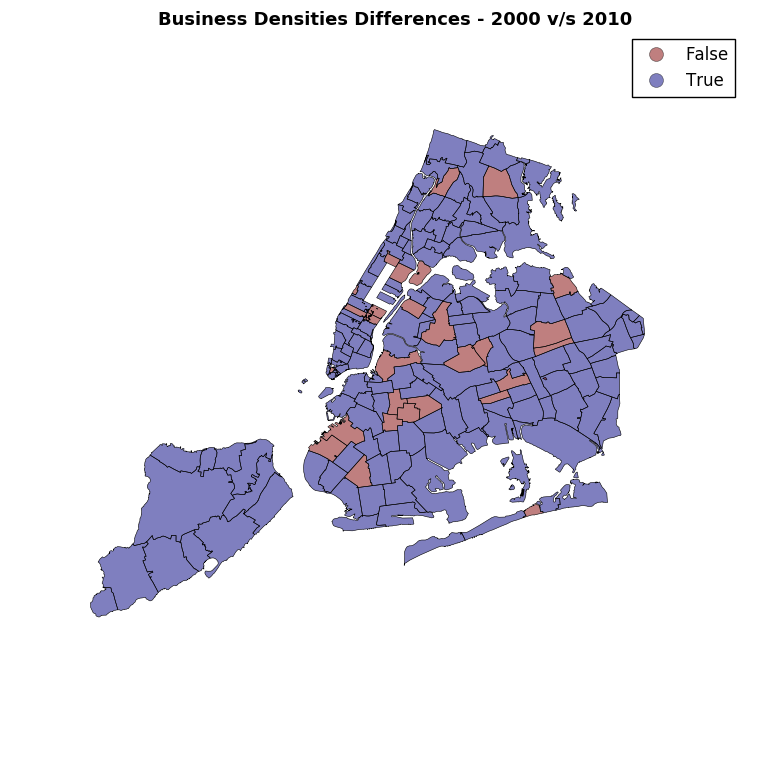

In [340]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

zip_codes_shape.plot(column="Density_Difference", categorical=True, k=5, 
                     cmap='jet_r',ax=ax, linewidth=0.4, 
                     edgecolor='black', legend=True)

ax.set_axis_off()
ax.set_title("Business Densities Differences - 2000 v/s 2010", 
             fontweight = 'bold', fontsize = '13')

#### Figure-4: It can be observed in this map, that there exists some differences between the Business Establishments/Densities from 2000 to 2010.
- There are more establishments in 2010 than there were in 2000.
- It can be seen clearly here now that Midtown has more density in 2010 than it had in 2000.
- It can also be clearly observed how Bronx, Brooklyn both have more establishments in 2010 than in 2000.
- Using this map to check and see if there is a difference helps in making sure that the analysis is going the intended way.

### More Serious Stuff

#### Downloading Alternatively with an SQL query from public data in cartoDB.
- Function provided for that purpose in the instructors notes: https://github.com/fedhere/PUI2016_final/blob/master/PUI2016_DATA.ipynb

In [442]:
SQL_SOURCE = 'https://fb55.cartodb.com/api/v2/sql'

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    """queries data from CartoDB SQL database
    Arguments:
    query: a string like 
            SELECT colum_name_1, column_name_2 FROM database_name
    format: the file format (e.g. CSV, GeoJson)
    source: the sql database url link
    Return:
        database as a string to be read in with the appropriate function
    """
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return StringIO(response.read())

### Selecting the Tables needed, to download from.
#### Using the code below, again found in the instructor's notes, downloading the respective tables as a whole.
- The MetaData has been observed for this code, and the resuting columns have been looked at for the same.
- The MetaData can be found in:
    - http://cosmo.nyu.edu/~fb55/PUI2016/data/
    - http://www.christinafriedle.com/uploads/1/8/4/7/1847486/lab1_mappingcensusdata.doc

#### Query and Download for the Census_Tract File

In [452]:
query = "SELECT * FROM table_2010_census_tracts"

In [453]:
datastream = queryCartoDB(query, format='GeoJSON')
datageo = json.loads(datastream.read())
ct = gpd.GeoDataFrame.from_features(datageo['features'])
ct.head()

,boro_code,boro_ct_2010,boro_name,cartodb_id,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng
0,3,3050804,Brooklyn,998,E,050804,508.04,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",BK42,Flatbush,4015,1110945.63082,4305.94762341
1,3,3027500,Brooklyn,1261,I,027500,275,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",BK35,Stuyvesant Heights,4003,1743574.56294,5390.78775209
2,2,2009200,Bronx,1294,E,009200,92,"(POLYGON ((-73.847279 40.829315, -73.847320999...",BX59,Westchester-Unionport,3709,3278193.62083,9143.90356952
3,4,4099100,Queens,1306,I,099100,991,"(POLYGON ((-73.791793 40.789352, -73.791563999...",QN49,Whitestone,4103,11557974.9909,17092.0365078
4,4,4000100,Queens,1407,I,000100,1,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",QN31,Hunters Point-Sunnyside-West Maspeth,4109,12286326.8522,40345.5358859


In [454]:
countyID = {'Bronx':'005',
           'Manhattan':'061',
           'Staten Island':'085',
           'Brooklyn':'047',
           'Queens':'081'}

In [455]:
ct['allcodes'] = list(zip(ct.boro_name, ct.ct_2010))
ct['geo_id']  = ct[['allcodes']].applymap(lambda x: 
                            ("1400000US36%03d%06d"%(int(countyID[x[0]]),int(x[1]))))

In [456]:
ct.head()

,boro_code,boro_ct_2010,boro_name,cartodb_id,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng,allcodes,geo_id
0,3,3050804,Brooklyn,998,E,050804,508.04,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",BK42,Flatbush,4015,1110945.63082,4305.94762341,"(Brooklyn, 050804)",1400000US36047050804
1,3,3027500,Brooklyn,1261,I,027500,275,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",BK35,Stuyvesant Heights,4003,1743574.56294,5390.78775209,"(Brooklyn, 027500)",1400000US36047027500
2,2,2009200,Bronx,1294,E,009200,92,"(POLYGON ((-73.847279 40.829315, -73.847320999...",BX59,Westchester-Unionport,3709,3278193.62083,9143.90356952,"(Bronx, 009200)",1400000US36005009200
3,4,4099100,Queens,1306,I,099100,991,"(POLYGON ((-73.791793 40.789352, -73.791563999...",QN49,Whitestone,4103,11557974.9909,17092.0365078,"(Queens, 099100)",1400000US36081099100
4,4,4000100,Queens,1407,I,000100,1,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",QN31,Hunters Point-Sunnyside-West Maspeth,4109,12286326.8522,40345.5358859,"(Queens, 000100)",1400000US36081000100


#### Query, Dowload and Wrangling for the Census 2000: DEC_00_SF1_DP1

In [450]:
query_00 = "SELECT geo_id, hc01_vc01, hc02_vc29, hc01_vc18 FROM dec_00_sf1_dp1"

In [449]:
datastream = queryCartoDB(query_00, format='JSON')
datageo = json.loads(datastream.read())
census_2000 = gpd.GeoDataFrame.from_dict(datageo['rows'])
census_2000.head()

,geo_id,hc01_vc01,hc01_vc18,hc02_vc29
0,1400000US36047054300,0,0.0,
1,1400000US36081121100,0,0.0,
2,1400000US36005003700,478,22.0,18.4
3,1400000US36005004900,246,30.0,20.7
4,1400000US36005005800,5,23.5,0.0


In [500]:
census_2000 = census_2000.rename(columns = {"hc01_vc01":"Total_Pop_Number",\
                                           "hc01_vc18":"Median_Age",\
                                           "hc02_vc29":"White_Pop_Percent"})
census_2000.head()

,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent
0,1400000US36047054300,0,0.0,
1,1400000US36081121100,0,0.0,
2,1400000US36005003700,478,22.0,18.4
3,1400000US36005004900,246,30.0,20.7
4,1400000US36005005800,5,23.5,0.0


#### Query, Dowload and Wrangling for the Census 2010: DEC_10_SF1_SF1DP1

In [457]:
query_10 = "SELECT geo_id, hd01_s001, hd01_s020, hd02_s078 FROM dec_10_sf1_sf1dp1"

In [471]:
datastream = queryCartoDB(query_10, format='JSON')
datageo = json.loads(datastream.read())
census_2010 = gpd.GeoDataFrame.from_dict(datageo['rows'])
census_2010.head()

,geo_id,hd01_s001,hd01_s020,hd02_s078
0,1400000US36081038301,0,0,
1,1400000US36005002400,4,38,50
2,1400000US36059990200,0,0,
3,1400000US36059990400,0,0,
4,1400000US36007012900,1532,59.8,98.2


In [473]:
census_2010 = census_2010.rename(columns = {"hd01_s001":"Total_Pop_Number",\
                                           "hd01_s020":"Median_Age",\
                                           "hd02_s078":"White_Pop_Percent"})
census_2010.head()

,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent
0,1400000US36081038301,0,0,
1,1400000US36005002400,4,38,50
2,1400000US36059990200,0,0,
3,1400000US36059990400,0,0,
4,1400000US36007012900,1532,59.8,98.2


#### Query, Dowload and Wrangling for the Income Census 2000: DEC_00_SF3_DP3_with_ann.csv

In [460]:
query_ic_00 = "SELECT geo_id, hc01_vc64 FROM dec_00_sf3_dp3_with_ann"

In [461]:
datastream = queryCartoDB(query_ic_00, format='JSON')
datageo = json.loads(datastream.read())
income_census_2000 = gpd.GeoDataFrame.from_dict(datageo['rows'])
income_census_2000.head()

,geo_id,hc01_vc64
0,1400000US36089991900,0
1,1400000US36001013703,68929
2,1400000US36005000200,42539
3,1400000US36005002400,0
4,1400000US36029001301,0


In [474]:
income_census_2000 = income_census_2000.rename(columns = {"hc01_vc64":"Median_HH_Income"})
income_census_2000.head()

,geo_id,Median_HH_Income
0,1400000US36089991900,0
1,1400000US36001013703,68929
2,1400000US36005000200,42539
3,1400000US36005002400,0
4,1400000US36029001301,0


#### Query, Dowload and Wrangling for the Income Census 2010: ACS_10_5YR_S1901_with_ann.csv

In [462]:
query_ic_10 = "SELECT geo_id, hc01_est_vc13 FROM acs_10_5yr_s1901_with_ann"

In [463]:
datastream = queryCartoDB(query_ic_10, format='JSON')
datageo = json.loads(datastream.read())
income_census_2010 = gpd.GeoDataFrame.from_dict(datageo['rows'])
income_census_2010.head()

,geo_id,hc01_est_vc13
0,1400000US36001000100,32333
1,1400000US36001000200,25354
2,1400000US36001000300,30932
3,1400000US36001000401,60909
4,1400000US36001000403,52807


In [475]:
income_census_2010 = income_census_2010.rename(columns = {"hc01_est_vc13":"Median_HH_Income"})
income_census_2010.head()

,geo_id,Median_HH_Income
0,1400000US36001000100,32333
1,1400000US36001000200,25354
2,1400000US36001000300,30932
3,1400000US36001000401,60909
4,1400000US36001000403,52807


#### Figuring out, and working with the Merging of the Census Tract files with the Census and Income_Census files for the years:
- 2000
- 2010

In [504]:
ct.shape

(2166, 15)

In [505]:
census_2000.shape

(4907, 4)

In [506]:
census_2010.shape

(4919, 4)

In [507]:
income_census_2000.shape

(4907, 2)

In [508]:
income_census_2010.shape

(4919, 2)

In [511]:
merged_2k = pd.merge(ct, census_2000, on = 'geo_id', how = 'left')
merged_2k.shape

(2166, 18)

In [529]:
merged_2000 = pd.merge(merged_2k, income_census_2000, on = 'geo_id', how = 'left')
print (merged_2000.shape)
merged_2000.head()

(2166, 19)


,boro_code,boro_ct_2010,boro_name,cartodb_id,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng,allcodes,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent,Median_HH_Income
0,3,3050804,Brooklyn,998,E,050804,508.04,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",BK42,Flatbush,4015,1110945.63082,4305.94762341,"(Brooklyn, 050804)",1400000US36047050804,NaN,NaN,NaN,NaN
1,3,3027500,Brooklyn,1261,I,027500,275,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",BK35,Stuyvesant Heights,4003,1743574.56294,5390.78775209,"(Brooklyn, 027500)",1400000US36047027500,4171,33.9,1.5,30241.0
2,2,2009200,Bronx,1294,E,009200,92,"(POLYGON ((-73.847279 40.829315, -73.847320999...",BX59,Westchester-Unionport,3709,3278193.62083,9143.90356952,"(Bronx, 009200)",1400000US36005009200,4877,31.7,30.1,36589.0
3,4,4099100,Queens,1306,I,099100,991,"(POLYGON ((-73.791793 40.789352, -73.791563999...",QN49,Whitestone,4103,11557974.9909,17092.0365078,"(Queens, 099100)",1400000US36081099100,6659,47.1,87.7,62341.0
4,4,4000100,Queens,1407,I,000100,1,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",QN31,Hunters Point-Sunnyside-West Maspeth,4109,12286326.8522,40345.5358859,"(Queens, 000100)",1400000US36081000100,1370,41.3,55.4,85898.0


In [531]:
merged_2000 = merged_2000.drop(['boro_code', 'boro_ct_2010', 'boro_name', 'cartodb_id',
                                'cdeligibil', 'ct_2010', 'ctlabel', 'ntacode', 'ntaname', 
                                'puma', 'shape_area', 'shape_leng', 'allcodes'], axis = 1)
merged_2000.head()

,geometry,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent,Median_HH_Income
0,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",1400000US36047050804,NaN,NaN,NaN,NaN
1,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",1400000US36047027500,4171,33.9,1.5,30241.0
2,"(POLYGON ((-73.847279 40.829315, -73.847320999...",1400000US36005009200,4877,31.7,30.1,36589.0
3,"(POLYGON ((-73.791793 40.789352, -73.791563999...",1400000US36081099100,6659,47.1,87.7,62341.0
4,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",1400000US36081000100,1370,41.3,55.4,85898.0


In [519]:
merged_2k10 = pd.merge(ct, census_2010, on = 'geo_id', how = 'left')
merged_2k10.shape

(2166, 18)

In [518]:
merged_2010 = pd.merge(merged_2k10, income_census_2010, on = 'geo_id', how = 'left')
print (merged_2010.shape)
merged_2010.head()

(2166, 19)


,boro_code,boro_ct_2010,boro_name,cartodb_id,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng,allcodes,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent,Median_HH_Income
0,3,3050804,Brooklyn,998,E,050804,508.04,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",BK42,Flatbush,4015,1110945.63082,4305.94762341,"(Brooklyn, 050804)",1400000US36047050804,6250,32.7,15.5,40188
1,3,3027500,Brooklyn,1261,I,027500,275,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",BK35,Stuyvesant Heights,4003,1743574.56294,5390.78775209,"(Brooklyn, 027500)",1400000US36047027500,4180,35.6,9.1,52958
2,2,2009200,Bronx,1294,E,009200,92,"(POLYGON ((-73.847279 40.829315, -73.847320999...",BX59,Westchester-Unionport,3709,3278193.62083,9143.90356952,"(Bronx, 009200)",1400000US36005009200,5017,33.3,29.5,45625
3,4,4099100,Queens,1306,I,099100,991,"(POLYGON ((-73.791793 40.789352, -73.791563999...",QN49,Whitestone,4103,11557974.9909,17092.0365078,"(Queens, 099100)",1400000US36081099100,6507,51.1,85.5,84350
4,4,4000100,Queens,1407,I,000100,1,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",QN31,Hunters Point-Sunnyside-West Maspeth,4109,12286326.8522,40345.5358859,"(Queens, 000100)",1400000US36081000100,4949,32.4,63.5,117750


In [532]:
merged_2010 = merged_2010.drop(['boro_code', 'boro_ct_2010', 'boro_name', 'cartodb_id',
                                'cdeligibil', 'ct_2010', 'ctlabel', 'ntacode', 'ntaname', 
                                'puma', 'shape_area', 'shape_leng', 'allcodes'], axis = 1)
merged_2010.head()

,geometry,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent,Median_HH_Income
0,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",1400000US36047050804,6250,32.7,15.5,40188
1,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",1400000US36047027500,4180,35.6,9.1,52958
2,"(POLYGON ((-73.847279 40.829315, -73.847320999...",1400000US36005009200,5017,33.3,29.5,45625
3,"(POLYGON ((-73.791793 40.789352, -73.791563999...",1400000US36081099100,6507,51.1,85.5,84350
4,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",1400000US36081000100,4949,32.4,63.5,117750


### Main DataSets to work with now after Downloading, Wrangling and Dropping Trivial Features:

#### Data for 2000

In [537]:
print (merged_2000.shape)
merged_2000.head()

(2166, 6)


,geometry,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent,Median_HH_Income
0,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",1400000US36047050804,NaN,NaN,NaN,NaN
1,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",1400000US36047027500,4171,33.9,1.5,30241.0
2,"(POLYGON ((-73.847279 40.829315, -73.847320999...",1400000US36005009200,4877,31.7,30.1,36589.0
3,"(POLYGON ((-73.791793 40.789352, -73.791563999...",1400000US36081099100,6659,47.1,87.7,62341.0
4,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",1400000US36081000100,1370,41.3,55.4,85898.0


#### Data for 2010

In [536]:
print (merged_2010.shape)
merged_2010.head()

(2166, 6)


,geometry,geo_id,Total_Pop_Number,Median_Age,White_Pop_Percent,Median_HH_Income
0,"(POLYGON ((-73.96140699999999 40.65217, -73.96...",1400000US36047050804,6250,32.7,15.5,40188
1,"(POLYGON ((-73.935008 40.682764, -73.937932 40...",1400000US36047027500,4180,35.6,9.1,52958
2,"(POLYGON ((-73.847279 40.829315, -73.847320999...",1400000US36005009200,5017,33.3,29.5,45625
3,"(POLYGON ((-73.791793 40.789352, -73.791563999...",1400000US36081099100,6507,51.1,85.5,84350
4,"(POLYGON ((-73.949113 40.754524, -73.949144 40...",1400000US36081000100,4949,32.4,63.5,117750
